<a href="https://colab.research.google.com/github/RAS-95/Encryptix/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.12

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,474 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,921 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-

In [ ]:
# Change default python3 to 3.12
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 1

# Confirm version
!python3 --version
# Python 3.12.1

update-alternatives: using /usr/bin/python3.12 to provide /usr/bin/python3 (python3) in auto mode
Python 3.12.4


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
train_dataset =  pd.read_csv('/content/drive/MyDrive/creditcardDataset/fraudTrain.csv')
test_dataset =  pd.read_csv('/content/drive/MyDrive/creditcardDataset/fraudTest.csv')

In [ ]:
train_dataset =  pd.read_csv('/content/fraudTrain.csv')
test_dataset =  pd.read_csv('/content/fraudTest.csv')

In [5]:
train_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [12]:
train_dataset.isnull().any()
#print("Missing Values:\n")

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [13]:
test_dataset.isnull().any()
#print("Missing Values:\n")

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [14]:
#Find non-numerical data in train dataset
train_dataset.select_dtypes(exclude='number').columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [15]:
#Find non-numerical data in test dataset
test_dataset.select_dtypes(exclude='number').columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()

    train_dataset[col] = le.fit_transform(train_dataset[col])
    label_encoders[col] = le

    test_dataset[col] = le.fit_transform(test_dataset[col])
    label_encoders[col] = le

In [17]:
train_dataset.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test_dataset.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [18]:
# Convert columns to datetime
train_dataset['trans_date_trans_time'] = pd.to_datetime(train_dataset['trans_date_trans_time'])
train_dataset['dob'] = pd.to_datetime(train_dataset['dob'])

# Extract year, month, day, and hour for the transaction date
train_dataset['transaction_year'] = train_dataset['trans_date_trans_time'].dt.year
train_dataset['transaction_month'] = train_dataset['trans_date_trans_time'].dt.month
train_dataset['transaction_day'] = train_dataset['trans_date_trans_time'].dt.day
train_dataset['transaction_hour'] = train_dataset['trans_date_trans_time'].dt.hour

train_dataset['birth_year'] = train_dataset['dob'].dt.year
train_dataset['birth_month'] = train_dataset['dob'].dt.month
train_dataset['birth_day'] = train_dataset['dob'].dt.day

train_dataset.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


#Test part

# Convert columns to datetime
test_dataset['trans_date_trans_time'] = pd.to_datetime(test_dataset['trans_date_trans_time'])
test_dataset['dob'] = pd.to_datetime(test_dataset['dob'])

# Extract year, month, day, and hour for the transaction date
test_dataset['transaction_year'] = test_dataset['trans_date_trans_time'].dt.year
test_dataset['transaction_month'] = test_dataset['trans_date_trans_time'].dt.month
test_dataset['transaction_day'] = test_dataset['trans_date_trans_time'].dt.day
test_dataset['transaction_hour'] = test_dataset['trans_date_trans_time'].dt.hour

test_dataset['birth_year'] = test_dataset['dob'].dt.year
test_dataset['birth_month'] = test_dataset['dob'].dt.month
test_dataset['birth_day'] = test_dataset['dob'].dt.day

test_dataset.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


In [19]:
print(train_dataset.shape)
print(test_dataset.shape)

(1296675, 23)
(555719, 23)


In [20]:
print(train_dataset.head(0))
print(train_dataset.head())

print(test_dataset.head(0))
print(test_dataset.head())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  36.011293  -82.048315         0   
1  99160  48.8878 -118.2105  ...  49.159047 -118.186462         0   
2  83252  42.1808 -112

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


<ipython-input-21-123f95838f2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x='is_fraud', kind='count', data=train_dataset, height=6, aspect=1, palette=['#2ecc71', '#e74c3c'])


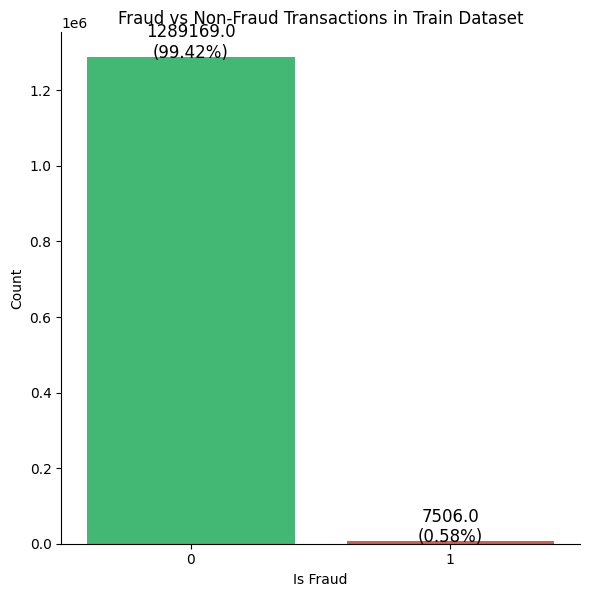

In [21]:
# Count and print the number of fraudulent and non-fraudulent transactions
fraud_counts = train_dataset['is_fraud'].value_counts()
print(fraud_counts)

# Create a catplot
plot = sns.catplot(x='is_fraud', kind='count', data=train_dataset, height=6, aspect=1, palette=['#2ecc71', '#e74c3c'])

# Annotate the plot with counts and percentages
for ax in plot.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({height / len(train_dataset) * 100:.2f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 10), textcoords='offset points')

# Set the title and labels using matplotlib's object-oriented interface
ax.set_title('Fraud vs Non-Fraud Transactions in Train Dataset')
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Count')

# Show the plot
plt.show()


<ipython-input-22-be9b707924a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_dataset, x='is_fraud', ax=ax, palette=['#2ecc71', '#e74c3c'])


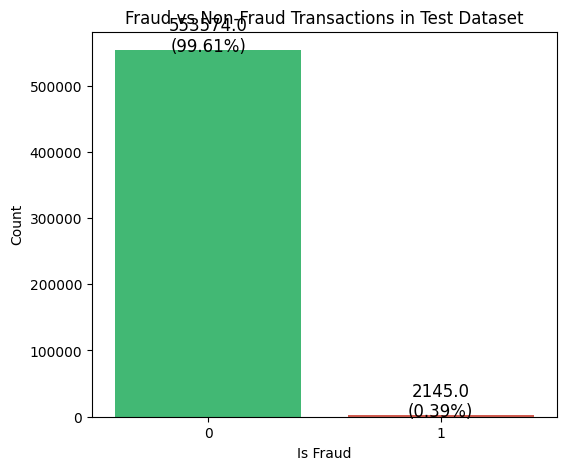

is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [22]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the count plot
sns.countplot(data=test_dataset, x='is_fraud', ax=ax, palette=['#2ecc71', '#e74c3c'])

# Set the title and labels
ax.set_title('Fraud vs Non-Fraud Transactions in Test Dataset')
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Count')

# Annotate the bars with counts and percentages
fraud_counts = test_dataset['is_fraud'].value_counts()
total = len(test_dataset)

for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{count}\n({percentage:.2f}%)',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()

# Print the counts of fraudulent and non-fraudulent transactions
print(fraud_counts)

In [23]:
print(train_dataset.shape)
print(test_dataset.shape)

(1296675, 23)
(555719, 23)


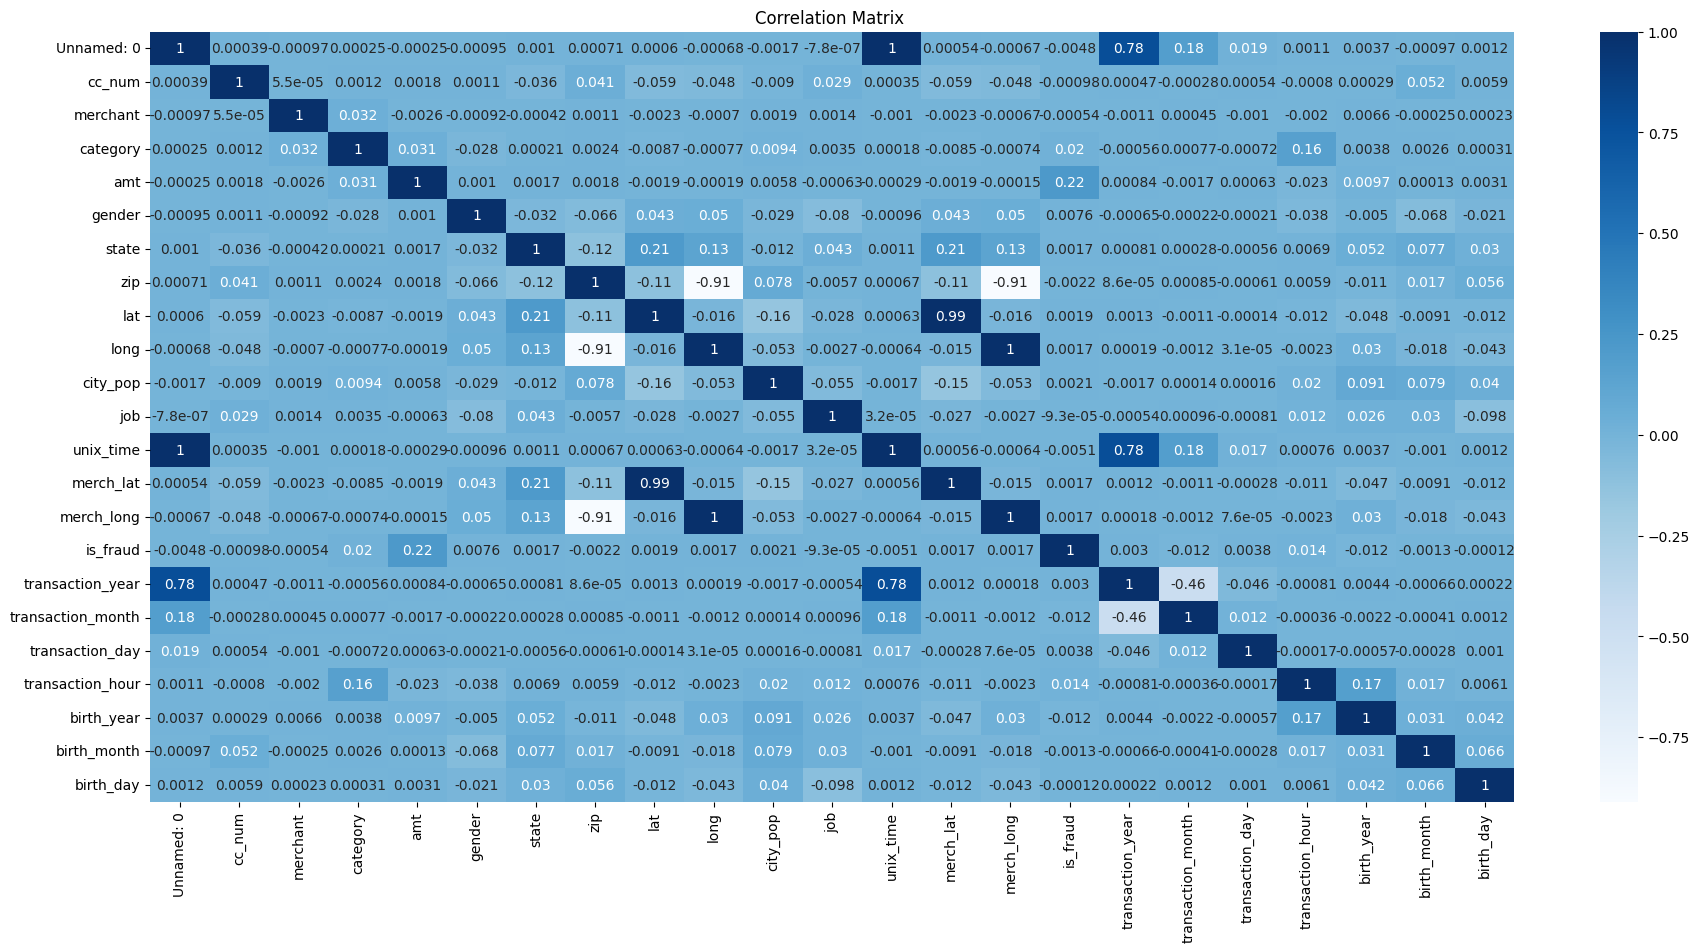

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_dataset' is your DataFrame containing the data
correlation_matrix = train_dataset.corr()

# Set up a new figure for visualization
plt.figure(figsize=(22, 10))

# Create a heatmap using the seaborn library with correlation matrix data
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

# Add a title to the plot
plt.title('Correlation Matrix ')

# Display the plot
plt.show()

In [25]:
# Apply one-hot encoding to the training dataset
df_processed = pd.get_dummies(train_dataset)
df_processed

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,0,2703186189652095,514,8,4.97,0,27,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,2019,1,1,0,1988,3,9
1,1,630423337322,241,4,107.23,0,47,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,2019,1,1,0,1978,6,21
2,2,38859492057661,390,0,220.11,1,13,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,2019,1,1,0,1962,1,19
3,3,3534093764340240,360,2,45.00,1,26,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,2019,1,1,0,1967,1,12
4,4,375534208663984,297,9,41.96,1,45,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,2019,1,1,0,1986,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,499,0,15.56,1,44,84735,37.7175,-112.4777,...,36.841266,-111.690765,0,2020,6,21,12,1961,11,24
1296671,1296671,6011149206456997,2,1,51.70,1,20,21790,39.2667,-77.5101,...,38.906881,-78.246528,0,2020,6,21,12,1979,12,11
1296672,1296672,3514865930894695,599,1,105.93,1,32,88325,32.9396,-105.8189,...,33.619513,-105.130529,0,2020,6,21,12,1967,8,30
1296673,1296673,2720012583106919,509,1,74.90,1,41,57756,43.3526,-102.5411,...,42.788940,-103.241160,0,2020,6,21,12,1980,8,18


In [26]:
# Extract features and target variable from the processed dataframe
x_train = df_processed.drop(columns='is_fraud')
y_train = df_processed['is_fraud']

In [27]:
df_processed_test = pd.get_dummies(data=test_dataset)
df_processed_test

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,transaction_year,transaction_month,transaction_day,transaction_hour,birth_year,birth_month,birth_day
0,0,2291163933867244,319,10,2.86,1,39,29209,33.9659,-80.9355,...,33.986391,-81.200714,0,2020,6,21,12,1968,3,19
1,1,3573030041201292,591,10,29.84,0,43,84002,40.3207,-110.4360,...,39.450498,-109.960431,0,2020,6,21,12,1990,1,17
2,2,3598215285024754,611,5,41.28,0,33,11710,40.6729,-73.5365,...,40.495810,-74.196111,0,2020,6,21,12,1970,10,21
3,3,3591919803438423,222,9,60.05,1,8,32780,28.5697,-80.8191,...,28.812398,-80.883061,0,2020,6,21,12,1987,7,25
4,4,3526826139003047,292,13,3.19,1,21,49632,44.2529,-85.0170,...,44.959148,-85.884734,0,2020,6,21,12,1955,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,507,5,43.77,1,23,63453,40.4931,-91.8912,...,39.946837,-91.333331,0,2020,12,31,23,1966,2,13
555715,555715,3556613125071656,264,7,111.84,1,42,77566,29.0393,-95.4401,...,29.661049,-96.186633,0,2020,12,31,23,1999,12,27
555716,555716,6011724471098086,496,7,86.88,0,46,99323,46.1966,-118.9017,...,46.658340,-119.715054,0,2020,12,31,23,1981,11,29
555717,555717,4079773899158,75,13,7.99,1,12,83643,44.6255,-116.4493,...,44.470525,-117.080888,0,2020,12,31,23,1965,12,15


In [28]:
x_test = df_processed.drop(columns='is_fraud', axis=1)
y_test = df_processed['is_fraud']

# LogisticRegression
# Decision Tree
# Random Forest

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train and evaluate a model
def train_evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('-'*60)

# Assuming x_train, y_train, x_test, y_test are already defined
# Initialize the models
logistic_regression_model = LogisticRegression(solver='liblinear')
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()

# List of models
models = [logistic_regression_model, decision_tree_model, random_forest_model]

# Train and evaluate each model
for model in models:
    train_evaluate_model(model, x_train, y_train, x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: LogisticRegression
Accuracy: 0.9942113482561166
Confusion Matrix:
[[1289169       0]
 [   7506       0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675

------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 1.0
Confusion Matrix:
[[1289169       0]
 [      0    7506]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675

--------------------------